# Project : Suplmental Kmeans

## Introduction

This is a suplemental part of the project. The idea is to implement k-means clustering for the iris data set.


## References

https://www.datacamp.com/tutorial/k-means-clustering-python?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720821&utm_adgroupid=157156374951&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=733936221293&utm_targetid=aud-1832882613722:dsa-2218886984380&utm_loc_interest_ms=&utm_loc_physical_ms=1007877&utm_content=&accountid=9624585688&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-emea_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&gad_source=1&gclid=Cj0KCQjwv_m-BhC4ARIsAIqNeBtcqQxamZLbu_HZzz-KqeYXnvGMhbiqEAkhefWZntcQgx3jKP1Yy2IaAuKgEALw_wcB

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


Import the necessary libraries to support project

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


Import Analysis project

In [40]:
import analysis as an

Load the iris dataset

In [41]:
return_code, df_iris = an.load_data(an.config)
if return_code != 0:
    print(f"Error loading data : {return_code}")
else:
    print("Data loaded successfully")
return_code = an.convert_to_metrics_df(an.config)
if return_code != 0:
    print(f"Error converting data to metrics dataframe : {return_code}")
else:
    print("Data converted to metrics dataframe successfully")
return_code = an.load_summary(an.config)
if return_code != 0:
    print(f"Error creating summary dataframe : {return_code}")
else:
    print("Summary dataframe created successfully")


Data loaded successfully
Data converted to metrics dataframe successfully
Summary dataframe created successfully


Import the kmeans module from sklearn

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Plot a scatter plot of the data

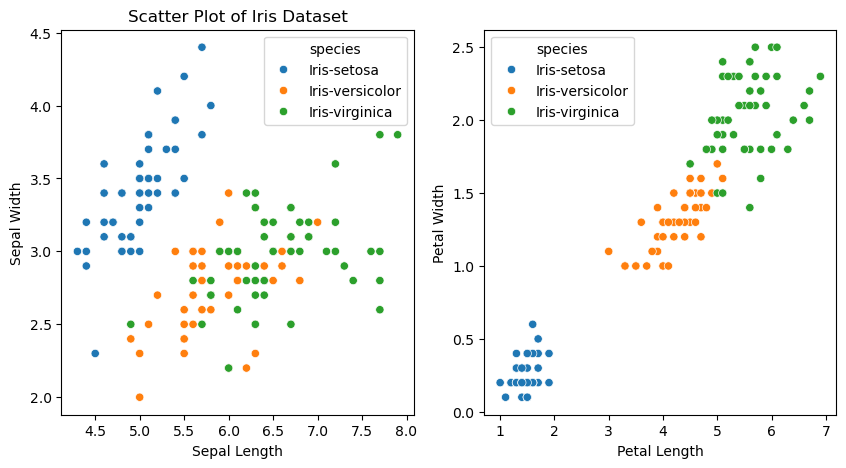

In [43]:
fig , ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title("Scatter Plot of Iris Dataset")
ax[0].set_xlabel("Sepal Length")
ax[0].set_ylabel("Sepal Width")
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df_iris, ax=ax[0])
ax[1].set_xlabel("Petal Length")
ax[1].set_ylabel("Petal Width")
sns.scatterplot(x="petal_length", y="petal_width", hue="species", data=df_iris, ax=ax[1])
plt.show()

Do a box Plot of the data

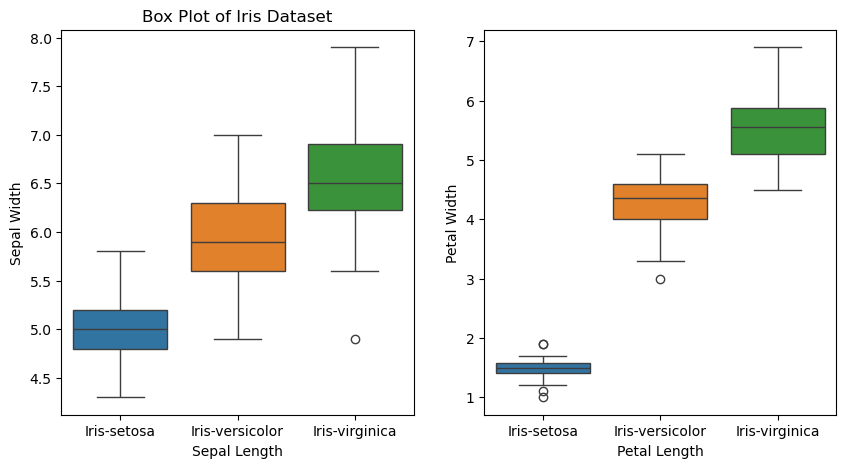

In [44]:
# do boxplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title("Box Plot of Iris Dataset")
ax[0].set_xlabel("Sepal Length")
ax[0].set_ylabel("Sepal Width")
sns.boxplot(x="species", y="sepal_length", data=df_iris,hue='species', ax=ax[0])
ax[1].set_xlabel("Petal Length")
ax[1].set_ylabel("Petal Width")
sns.boxplot(x="species", y="petal_length", data=df_iris,hue='species', ax=ax[1])
plt.show()

Bring down to the standard scale ( mean = 0, std = 1)

In [45]:
scaler = StandardScaler()
# Standardize the data
# Fit the StandardScaler to the data only  interested in the features
X = df_iris.iloc[:, :-1].values
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)


[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

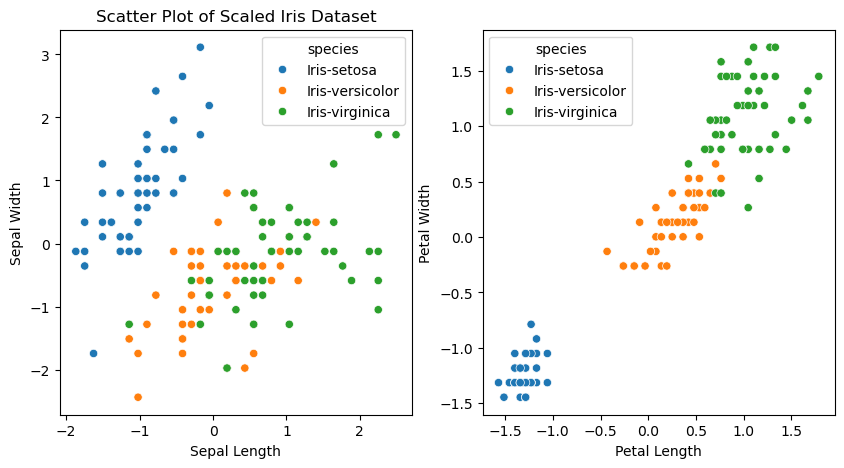

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# scatter plot of the scaled data
ax[0].set_title("Scatter Plot of Scaled Iris Dataset")
ax[0].set_xlabel("Sepal Length")
ax[0].set_ylabel("Sepal Width")
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_iris["species"], ax=ax[0])
ax[1].set_xlabel("Petal Length")
ax[1].set_ylabel("Petal Width")
sns.scatterplot(x=X_scaled[:, 2], y=X_scaled[:, 3], hue=df_iris["species"], ax=ax[1])
plt.show()


Now apply RPA to reduce the data to 2D

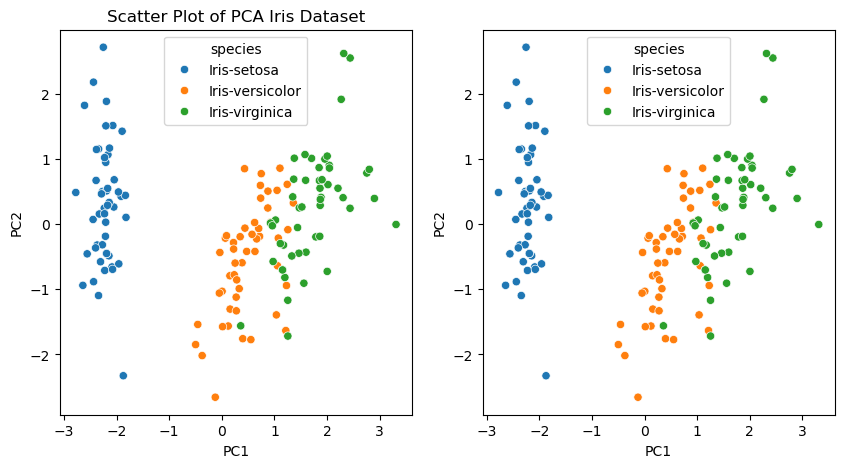

In [48]:
RPA = PCA(n_components=2)
X_rpa = RPA.fit_transform(X_scaled)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title("Scatter Plot of PCA Iris Dataset")
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
sns.scatterplot(x=X_rpa[:, 0], y=X_rpa[:, 1], hue=df_iris["species"], ax=ax[0])
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC2")
sns.scatterplot(x=X_rpa[:, 0], y=X_rpa[:, 1], hue=df_iris["species"], ax=ax[1])
plt.show()